In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#plt.style.use('dark_background') # Uncomment for dark themes
import numpy as np

from ipywidgets import widgets  

import numpy.random as random

In [2]:
def centralLimit(numVariables, numSamples, distribution, plotNorm):
    random.seed(23)
    samples = []
    for sample in range(numSamples):
        sampleValue = 0.0
        for variable in range(numVariables):
            if(distribution == "uniform"):
                randomValue = np.random.uniform()
                
            if(distribution == "exponential"):
                randomValue = np.random.exponential()
            
            if(distribution == "binomial"):
                randomValue = np.random.binomial(1, 0.4)
                
            sampleValue += randomValue
        samples.append(sampleValue / numVariables)
    fig = plt.figure(figsize=(10,5))
    fig.patch.set_alpha(0.0)
    plt.gca().patch.set_alpha(0.0)
    n, bins, patches = plt.hist(samples, 50, normed=True, color='darkgrey')
    if(plotNorm == True):
        y = mlab.normpdf(bins, np.mean(samples), np.std(samples))
        l = plt.plot(bins, y, 'r--', linewidth=3)
    

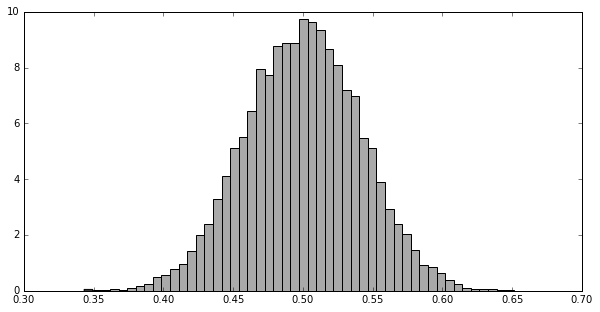

In [3]:
widgets.interact(
    centralLimit, 
    numVariables=(1,100,1), 
    numSamples=(1, 20000, 100), 
    distribution=("uniform", "exponential", "binomial"),
    plotNorm=False
)